<a href="https://colab.research.google.com/github/johnquisimc-lang/LABORATORIO-13-JHONQUI/blob/main/LABORATORIO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Presentado por: Jhon Quiñonez
Grupo Inteligencia Artificila

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


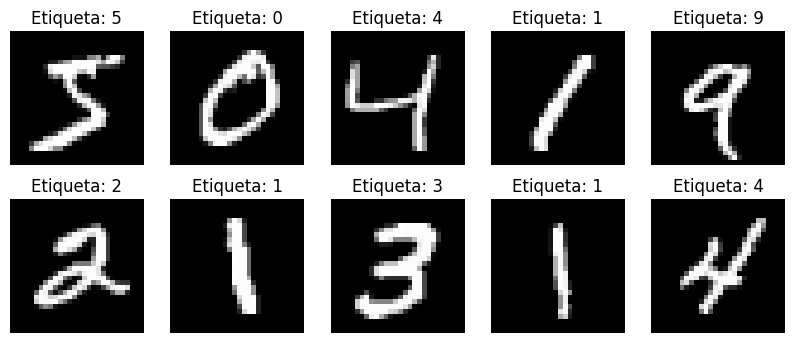

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8832 - loss: 0.4156 - val_accuracy: 0.9496 - val_loss: 0.1590
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9635 - loss: 0.1217 - val_accuracy: 0.9684 - val_loss: 0.1042
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9760 - loss: 0.0798 - val_accuracy: 0.9753 - val_loss: 0.0784
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9832 - loss: 0.0565 - val_accuracy: 0.9786 - val_loss: 0.0724
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9780 - val_loss: 0.0738
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9757 - loss: 0.0850

Exactitud del modelo en datos de prueba: 97.80%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


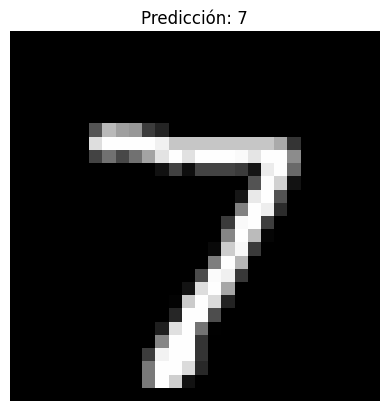

In [1]:
# Paso 1: Importar las librerías necesarias
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Paso 2: Cargar el conjunto de datos MNIST
# Este dataset viene incluido en Keras
(X_entrenamiento, y_entrenamiento), (X_prueba, y_prueba) = keras.datasets.mnist.load_data()

# Paso 3: Visualizar algunas imágenes
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_entrenamiento[i], cmap="gray")
    plt.title(f"Etiqueta: {y_entrenamiento[i]}")
    plt.axis("off")
plt.show()

# Paso 4: Normalizar los valores de los píxeles (de 0-255 a 0-1)
X_entrenamiento = X_entrenamiento / 255.0
X_prueba = X_prueba / 255.0

# Paso 5: Crear el modelo (una red neuronal simple)
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Aplana la imagen a un vector
    keras.layers.Dense(128, activation='relu'),  # Capa oculta con 128 neuronas
    keras.layers.Dense(10, activation='softmax') # Capa de salida (10 clases)
])

# Paso 6: Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Paso 7: Entrenar el modelo
historial = modelo.fit(X_entrenamiento, y_entrenamiento, epochs=5, validation_data=(X_prueba, y_prueba))

# Paso 8: Evaluar el modelo
pérdida, exactitud = modelo.evaluate(X_prueba, y_prueba)
print(f"\nExactitud del modelo en datos de prueba: {exactitud * 100:.2f}%")

# Paso 9: Hacer predicciones
predicciones = modelo.predict(X_prueba)

# Mostrar una predicción
import numpy as np
indice = 0
plt.imshow(X_prueba[indice], cmap="gray")
plt.title(f"Predicción: {np.argmax(predicciones[indice])}")
plt.axis("off")
plt.show()


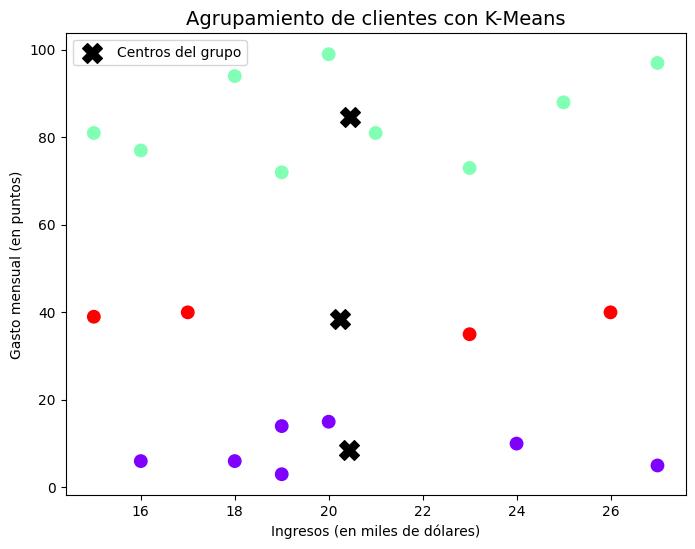

In [2]:
# ===========================================
# APRENDIZAJE NO SUPERVISADO CON K-MEANS
# ===========================================

# Paso 1: Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Paso 2: Crear un conjunto de datos (simulación)
# Supongamos que estos son clientes con "Ingresos" y "Gasto mensual"
X = np.array([
    [15, 39], [15, 81], [16, 6], [16, 77], [17, 40], [18, 6],
    [18, 94], [19, 3], [19, 72], [19, 14], [20, 99], [20, 15],
    [21, 81], [23, 35], [23, 73], [24, 10], [25, 88], [26, 40],
    [27, 5], [27, 97]
])

# Paso 3: Aplicar el algoritmo K-Means
# Vamos a dividir en 3 grupos
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtener los grupos y centros
labels = kmeans.labels_
centros = kmeans.cluster_centers_

# Paso 4: Visualizar los resultados
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', s=80)
plt.scatter(centros[:,0], centros[:,1], c='black', marker='X', s=200, label='Centros del grupo')
plt.title("Agrupamiento de clientes con K-Means", fontsize=14)
plt.xlabel("Ingresos (en miles de dólares)")
plt.ylabel("Gasto mensual (en puntos)")
plt.legend()
plt.show()
